In [8]:
import pyshark
import http, datetime
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

start_time = 0
total_bytes = 0
rtt_max = 0

th_without_fw = []
th_with_fw = []
rtt_without_fw = []
rtt_with_fw = []


In [9]:
def process_packet(packet, type):
    global start_time, total_bytes, rtt_max

    if start_time == 0:
            start_time = float(packet.sniff_timestamp)
        
    total_bytes += int(packet.length)
               
    for layer in packet.layers:
        if ( layer.layer_name == 'tcp'):
            for field in layer.field_names:
                if field == 'analysis_ack_rtt':
                    value = getattr(layer, field)
                    
                    rtt_max = max(rtt_max, float(value))
                    return

def calculate_throughput(duration):
    global total_bytes
    throughput = total_bytes / duration
    return throughput


In [18]:
def analyze_pcap(pcap_file, fw_status):
    # Global variables to store start time and total bytes
    global start_time, total_bytes, rtt_max, th_without_fw, th_with_fw, rtt_without_fw, rtt_with_fw
    
    start_time = 0
    total_bytes = 0
    rtt_max = 0

    ip_address = "167.71.234.225"

    display_filter = f'ip.addr == {ip_address} and '
    if ( 'ftp' in pcap_file ):
        type = 'ftp'
        display_filter = display_filter + 'tcp'
    else: 
        print("incorrect input filename!")
        return


    # Create a capture object and start capturing packets
    capture = pyshark.FileCapture(pcap_file, display_filter=display_filter)

    # Start packet capture and process packets
    count = 0
    for packet in capture:
        count += 1
        process_packet(packet, type)



    # Calculate duration and throughput
    end_time = float(packet.sniff_timestamp)
    duration = end_time - start_time

    throughput = calculate_throughput(duration)
    # print(f'{fw_status}:')
    # print(f'Throughput: {throughput} bytes/s')
    # print(f'RTT (max): {rtt_max} sec.')
    if fw_status == "with firewall":
        th_with_fw.append(throughput)
        rtt_with_fw.append(rtt_max)
    else:
        th_without_fw.append(throughput)
        rtt_without_fw.append(rtt_max)

    # Close the capture
    capture.close()
    
def experiment(iter):
    #print(f'Experiment - {iter}')
    fw_status = "with firewall"
    pcap_file = f'/mnt/Store/PACNproject/pcap_files/1/with_fw_ftp_{iter}.pcapng'
    analyze_pcap(pcap_file, fw_status)
    
    fw_status = "without_firewall"
    pcap_file = f'/mnt/Store/PACNproject/pcap_files/1/without_fw_ftp_{iter}.pcapng'
    analyze_pcap(pcap_file, fw_status)
    

[28979.101941887817, 46668.57065255724, 147021.65067876116, 79716.13667546296, 31031.89685930994, 43635.836255286566, 45844.85525304769, 69568.5021187666, 47168.97807616893, 75735.95560933663]
[66669.67849541931, 125982.8285602499, 165508.21437084817, 76661.14805707373, 82686.11558012236, 71821.28274527632, 65914.9916894794, 68319.32194494037, 63398.98426803307, 73495.09179185229]


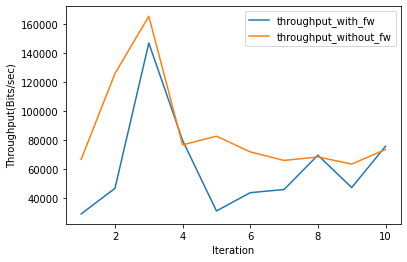

[4.970999046, 0.42230746, 0.565922658, 1.035937378, 5.512334478, 4.032160171, 3.037424856, 1.113658422, 4.63867681, 1.183943995]
[1.126570855, 0.581787318, 0.457251919, 1.133776407, 0.927943514, 0.966782005, 1.305029227, 1.204774004, 1.331167143, 0.962029806]


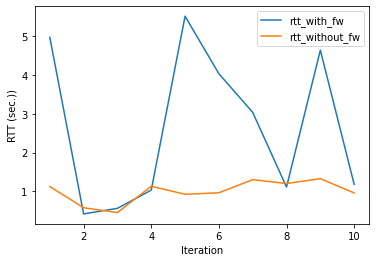

In [19]:
th_without_fw = []
th_with_fw = []
rtt_without_fw = []
rtt_with_fw = []

for i in range(1,11):
    experiment(i)

print(th_with_fw)
print(th_without_fw)
plt.plot( range(1, 11), th_with_fw, label="throughput_with_fw")
plt.plot( range(1, 11), th_without_fw, label="throughput_without_fw")
plt.ylabel("Throughput(Bits/sec)")
plt.xlabel("Iteration")
plt.legend()
plt.show()

print(rtt_with_fw)
print(rtt_without_fw)
plt.plot( range(1, 11), rtt_with_fw, label="rtt_with_fw")
plt.plot( range(1, 11), rtt_without_fw, label="rtt_without_fw")
plt.ylabel("RTT (sec.))")
plt.xlabel("Iteration")
plt.legend()
plt.show()

In [ ]:
import requests

url = 'https://example.com'  # Replace with the URL of the site you want to reload

# Number of iterations for reloading the site
num_iterations = 10

# Variables for storing latency and throughput values
latencies = []
throughputs = []

for _ in range(num_iterations):
    # Send the HTTP GET request and measure the time taken
    start_time = time.time()
    response = requests.get(url)
    end_time = time.time()

    # Calculate latency (in seconds)
    latency = end_time - start_time
    latencies.append(latency)

    # Calculate throughput (in bytes per second)
    content_length = int(response.headers.get('content-length', 0))
    throughput = content_length / latency
    throughputs.append(throughput)

# Calculate average latency and throughput
avg_latency = sum(latencies) / len(latencies)
avg_throughput = sum(throughputs) / len(throughputs)

print(f"Average Latency: {avg_latency} seconds")
print(f"Average Throughput: {avg_throughput} bytes/second")


NameError: name 'time' is not defined

In [ ]:
# # Global variables to store start time and total bytes
# start_time = 0
# total_bytes = 0
# ip_address = "167.71.234.225"
# display_filter = f'ip.addr == {ip_address} and http'
# pcap_file_output = '/mnt/Store/PACNproject/pcap_files/' + 'first.pcap'

# # Define the capture duration and output file name
# capture_duration = 5  # Capture duration in seconds

# # Create a capture object and start capturing packets
# capture = pyshark.LiveCapture(interface='wlp4s0', display_filter=display_filter, only_summaries=True, output_file=pcap_file_output)

# # Start the capture and save packets to the output file
# capture.sniff(timeout=capture_duration, packet_count=0)

# # Start packet capture and process packets
# for packet in capture:
#     process_packet(packet)

# # Calculate duration and throughput
# end_time = float(packet.sniff_timestamp)
# duration = end_time - start_time
# throughput = calculate_throughput(duration)
# print(f'Throughput: {throughput} bytes/s')

# # Calculate RTT
# rtt = calculate_rtt(pcap_file_output)
# print(f'RTT: {rtt} seconds')

# # Close the capture
# capture.close()
